#Cross Validation

##KFold

https://velog.io/@hhhs101/%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9DK-foldStratified-k-fold

https://bbdata.tistory.com/10

교차검증이란 말그대로 훈련데이터를 교차로 바꿔가면서 훈련의 정확도를 보는것이다

KFold 는 가장 보편적으로 사용되는 교차검증 중 하나이다

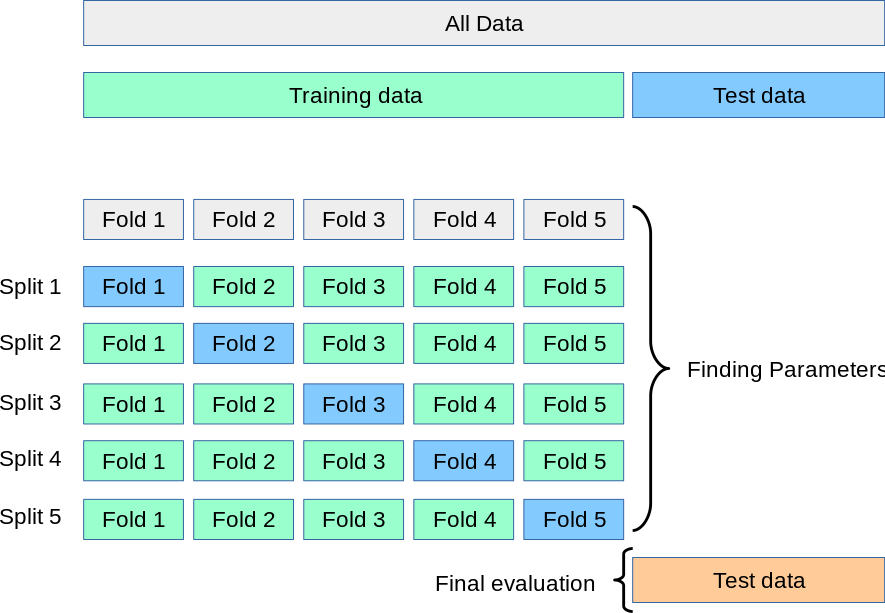

K-Fold는 K개의 fold를 만들어서 진행하는 교차검증이다

일반적으로 사용되는 교차 검증 방법 중 하나로, Training set과 Validation을 여러번 나눈 뒤 모델의 학습을 검증한다.

보통 회귀 모델에 사용되고, 데이터가 독립적이고 동일한 분포를 가질 때 사용한다. 위 그림에서는 데이터를 K등분(5등분)한 뒤, 1/5를 검증데이터로 나머지 4/5를 학습데이터로 나눈다. 

각각의 1/5를 검증데이터로 바꾸며 성능을 평가한다. 그 결과 총 5개의 성능 결과가 나올 것이고 5개의 평균을 학습 모델의 성능이라 판단한다.



## Stratified K-Fold

데이터가 편향돼있는경우엔 K-Fold를 사용했을때 성능 평가가 잘 되지 않을수 있다.

따라서 이럴땐 stratified K-Fold CV를 사용한다

한마디로 보편적인 상황에서는 K-Fold를 사용하나 불균형한 Dataset에서는 Stratified K-Fold를 사용하는것이다

 Stratified K-Fold 는 target데이터의 비율을 일정하게 유지하며, 교차 검증을 진행한다

K-Fold 는 train,validation 을 random하게 나눠주게 되므로 그 비율이 어긋날수도 있다 그렇게 되면 당연히 검증이 제대로 이루어지지 않게될것이다 
일반적으로 데이터가 imbalace한 경우 train, validation셋의 label의 비율이 어긋나게 될것이다

Stratified K-Fold는 원본 데이터에서 레이블 분포를 먼저 고려한뒤, 이 분포와 동일하게 학습 및 검증 데이터 세트를 분배한다 
때문에 imbalance 한 training set에서 비율에 맞게 train, validation 셋을 나눌수 있다

일반적으로 회귀에는 기본 k-겹 교차검증을 사용하고, 분류에는 StratifiedKFold를 사용한다.



##Group KFold

https://woolulu.tistory.com/71

https://velog.io/@hhhong/Cross-validation

* 레이블에 기반한 Group KFold 분할


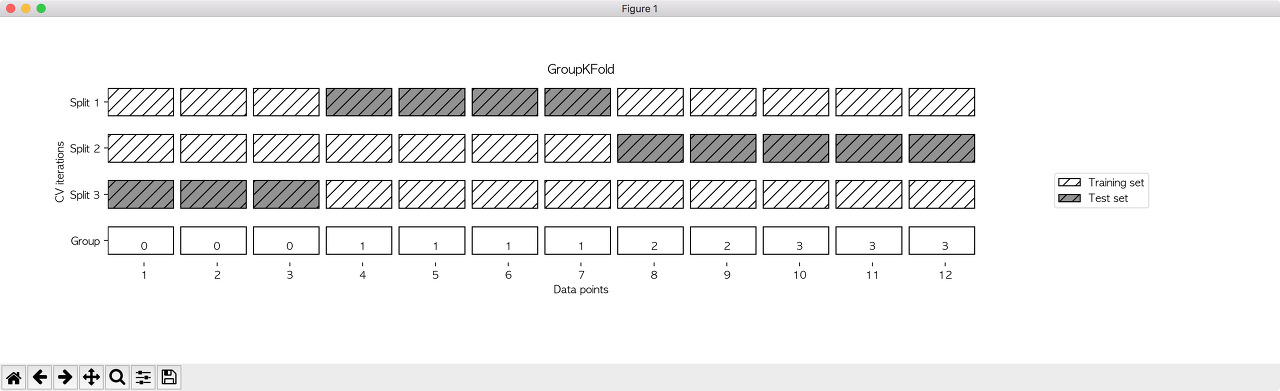

위 그림에서 볼수있듯이 각 분할에서 한 그룹 전체가 훈련세트 아니면 테스트 세트에 있다

데이터 안에 매우 연관된 그룹이 있을떄도 교차 검증을 사용한다

<<얼굴 사진에서 표정을 인식하는 시스템을 만들기 위해 100명의 사진을 모았다고 가정>>

한 사람을 찍은 여러장의 사진이 각기 다른 표정을 담고있다 => 이 데이터 셋에 없는 사람의 표정을 정확히 구분할수있는 분류기를 만드는것이 목표

같은 사람의 사진이 훈련 세트와 테스트 세트에 모두 나타날수 있으므로 그룹별 교차 검증을 하는것이 타당하다

새얼굴에 대한 일반화 성능을 더 정확하게 평가하려면 훈련 세트와 테스트 세트에 서로 다른 사람의 사진이 들어가도록 해야한다

이를 위해 사진의 사람이 누구인지 기록한 배열을  groups 매개변수로 전달 받을수있는 GroupKFold를 사용할수 있다

groups 배열은 훈련 세트와 테스트 세트를 만들때 분리되지 않아야 할 그룹을 지정하는것이라 클래스 레이블과는 다르다


일반적인 예를는 의료분야가 있다

여기서는 같은 환자로 부터 얻은 여러 샘플을 가지고 새로운 환자에게 일반화 하는것이 목적

비슷하게 음성인식에서도 데이터셋에 같은 사람의 목소리가 여러개 녹음되어 있을수 있으며, 관심사항은 새로운 사람의 대화를 인식하는것이다



In [ ]:
from sklearn.model_selection import GroupKFold
import numpy as np

X = np.array([0.1, 0.2, 2.2, 2.4, 2.3, 4.55, 5.8, 8.8, 9, 10])
y = np.array(["a", "b", "b", "b", "c", "c", "c", "d", "d", "d"])
groups = np.array([1, 1, 1, 2, 2, 2, 3, 3, 3, 3])

gkf = GroupKFold(n_splits=3)
gkf.get_n_splits(X, y, groups)
for train_index, test_index in gkf.split(X, y, groups=groups):
    print("%s %s" % (train_index, test_index))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train, X_test, y_train, y_test)


[0 1 2 3 4 5] [6 7 8 9]
[0.1  0.2  2.2  2.4  2.3  4.55] [ 5.8  8.8  9.  10. ] ['a' 'b' 'b' 'b' 'c' 'c'] ['c' 'd' 'd' 'd']
[0 1 2 6 7 8 9] [3 4 5]
[ 0.1  0.2  2.2  5.8  8.8  9.  10. ] [2.4  2.3  4.55] ['a' 'b' 'b' 'c' 'd' 'd' 'd'] ['b' 'c' 'c']
[3 4 5 6 7 8 9] [0 1 2]
[ 2.4   2.3   4.55  5.8   8.8   9.   10.  ] [0.1 0.2 2.2] ['b' 'c' 'c' 'c' 'd' 'd' 'd'] ['a' 'b' 'b']


각 그룹은 다른 test fold에 있고, 같은 그룹은 test나 train에 동시에 포함되지 않는다. 즉, 두 개의 다른 폴드에 동일한 그룹이 나타나지 않는다.

이때 fold들은 데이터의 불균형 때문에 모두 정확히 같은 크기로 나누어지지 않는다는 점을 주의하자.


##cross_val_score

cross_val_score( ) 함수는 교차 검증을 쉽게 하기 위한 함수이다.

cross_val_score( 알고리즘, 피쳐 데이터 세트, 레이블 데이터 세트, 스코어링 기준, 폴드수(cv) ) 형태로 쓰기 때문에, 교차 검증의 컨트롤이 쉬워진다.

 

## GridSearchCV

https://rudolf-2434.tistory.com/10

GridSearchCV 란?

사이킷런에서는 분류 알고리즘이나 회귀 알고리즘에 사용되는 하이퍼파라미터를 순차적으로 입력해 학습을 하고 측정을 하면서 가장 좋은 파라미터를 알려준다. GridSearchCV가 없다면 max_depth 가 3일때 가장 최적의 스코어를 뽑아내는지 1일때 가장 최적인 스코어를  뽑아내는지 일일이 학습을 해야 한다. 하지만 grid 파라미터 안에서 집합을 만들고 적용하면 최적화된 파라미터를 뽑아낼 수 있다.

GridSearchCV 클래스의 생성자 정리

-estimator : classifier, regressor, pipeline 등 가능

-param_grid : 튜닝을 위해 파라미터, 사용될 파라미터를 dictionary 형태로 만들어서 넣는다.

-scoring : 예측 성능을 측정할 평가 방법을 넣는다. 보통 accuracy 로 지정하여서 정확도로 성능 평가를 한다.

-cv : 교차 검증에서 몇개로 분할되는지 지정한다.

-refit : True가 디폴트로 True로 하면 최적의 하이퍼 파라미터를 찾아서 재학습 시킨다.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

iris_data = load_iris()
label = iris_data.target
data = iris_data.data

X_train, X_val, y_train, y_val = train_test_split(data, label, test_size=0.2)


# GridSearchCV의 param_grid 설정
params = {
    'max_depth': [2, 3],
    'min_samples_split': [2, 3]
}

dtc = DecisionTreeClassifier()

grid_tree = GridSearchCV(dtc, param_grid=params, cv=3, refit=True)
grid_tree.fit(X_train, y_train)

print('best parameters : ', grid_tree.best_params_)
print('best score : ', grid_tree.best_score_)
em = grid_tree.best_estimator_
pred = em.predict(X_val)
accuracy_score(y_val, pred)


best parameters :  {'max_depth': 3, 'min_samples_split': 2}
best score :  0.9583333333333334


0.9666666666666667